In [2]:
import matplotlib.pyplot as plt
import numpy as np

# General Fourier Transform

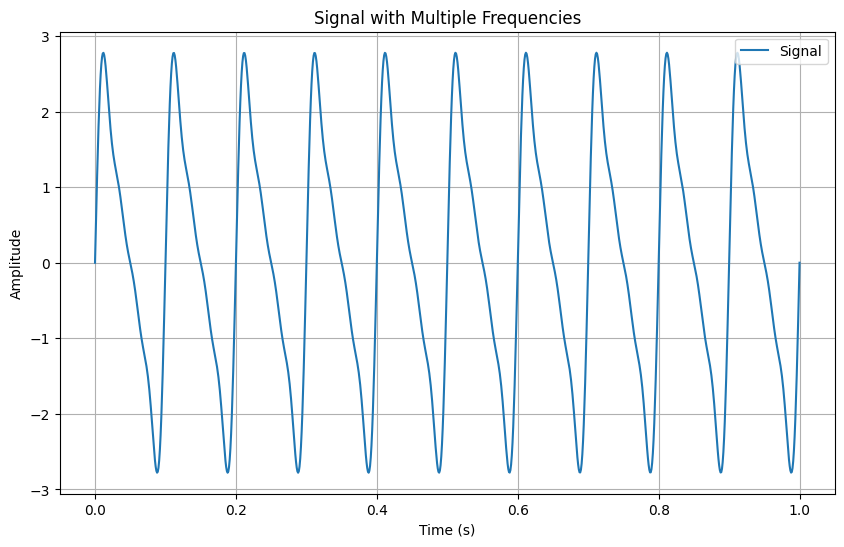

In [3]:
Fs = 1000
T = 1 / Fs
end_time = 1
time = np.linspace(0, end_time, Fs)
amp = [2, 1, 0.5, 0.2]
freq = [10, 20, 30, 40]


def get_signal(time: np.ndarray, amp: float, freq: float) -> np.ndarray:
    return amp * np.sin(2 * np.pi * freq * time)


signal = sum(get_signal(time, a, f) for a, f in zip(amp, freq, strict=False))

plt.figure(figsize=(10, 6))
plt.plot(time, signal, label="Signal")
plt.title("Signal with Multiple Frequencies")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

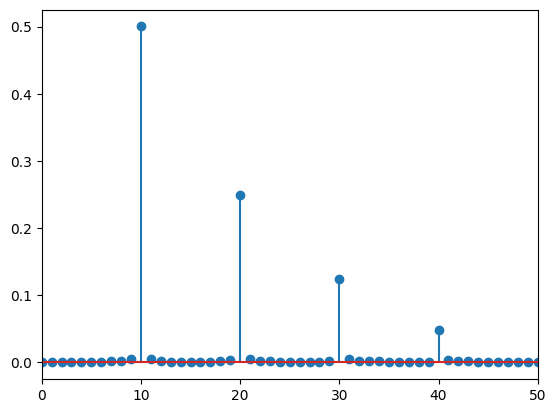

In [4]:
s_fft = np.fft.fft(signal)
amp_fft = np.abs(s_fft) / (len(signal) * 2)
freqs = np.fft.fftfreq(len(signal), T)

plt.xlim(0, 50)
plt.stem(freqs, amp_fft, label="FFT Amplitude")
plt.show()

# Fourier Transform in q space

In [6]:
%load_ext autoreload
%autoreload 2


import sys

sys.path.append("..")

100%|██████████| 10/10 [00:00<00:00, 10010.27it/s]


q shape: (100,), Rs shape: (10, 100), z shape: (1000,)


Fourier Transform: 1it [00:00, 62.82it/s]


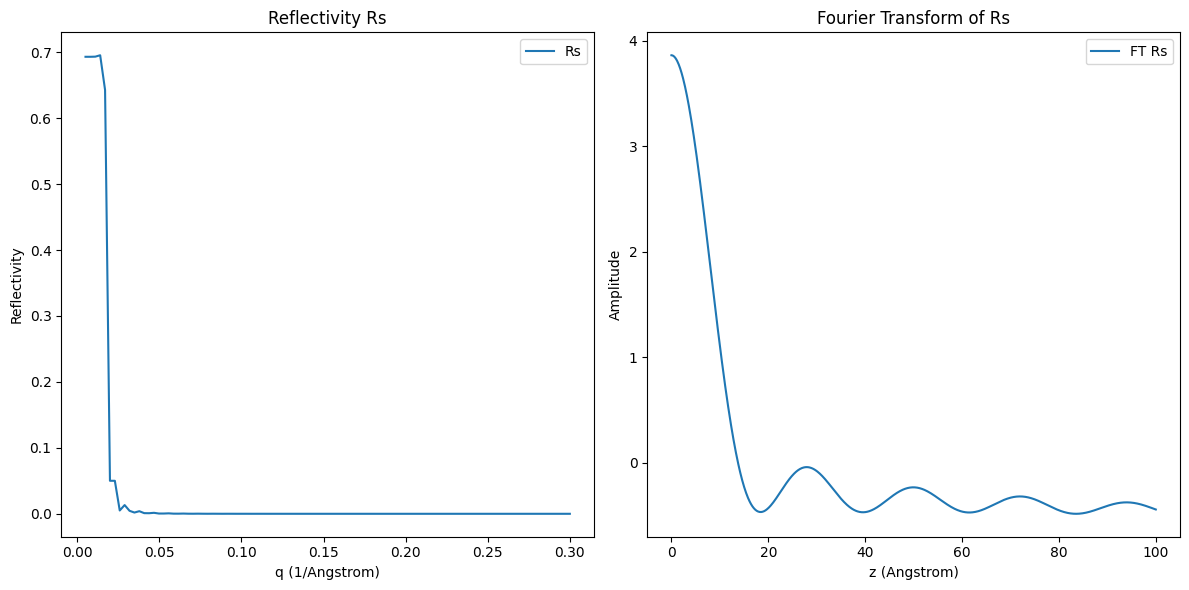

FT Rs shape: (1000,), Result shape: (1000,)
FT Rs: 3.8605665637591535


In [ ]:
from pathlib import Path

from reflectolearn.io import get_data
from reflectolearn.math_utils import normalize, q_fourier_transform_multisample

file: Path = Path("X:\\XRR_AI\\hdf5_XRR\\raw_data") / "p100o3_paper.h5"
idx: int = 3
data: dict[str, np.ndarray] = get_data(file)
q: np.ndarray = data["q"].astype(np.float32)
Rs: np.ndarray = data["Rs"]
z: np.ndarray = np.linspace(0, 100, 1000)

print(f"q shape: {q.shape}, Rs shape: {Rs.shape}, z shape: {z.shape}")
FT_Rs = q_fourier_transform_multisample(Rs, q, z, show_progress=True)

FT_Rs = np.abs(FT_Rs[idx]) ** 2
FT_Rs = normalize(FT_Rs)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(q, np.log1p(Rs[idx]), label="Rs")
axs[0].set_title("Reflectivity Rs")
axs[0].set_xlabel("q (1/Angstrom)")
axs[0].set_ylabel("Reflectivity")
axs[1].plot(z, FT_Rs, label="FT Rs")
axs[1].set_title("Fourier Transform of Rs")
axs[1].set_xlabel("z (Angstrom)")
axs[1].set_ylabel("Amplitude")
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()
print(f"FT Rs shape: {FT_Rs.shape}, Result shape: {result.shape}")
print(f"FT Rs: {FT_Rs[idx]}")